In [66]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [67]:
df = pd.read_csv(r'C:\Users\Thavamani\Desktop\ExcelR-Project1\cars24_20221210.csv')
df

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,storename,isc24assured,registrationcity,registrationstate,benefits,discountprice,price,url,createdDate
0,Hyundai Elite i20,Hyundai,Elite I20,Kochi,2017,Petrol,35939,2,Manual,Hatchback,Kochi-Pns,False,Kozhikode,Kerala,13898,47399,607000,https://www.cars24.com/buy-used-hyundai-elite-...,2022-03-24
1,Maruti Alto 800,Maruti,Alto 800,Mumbai,2016,Petrol + Cng,6180,1,Manual,Hatchback,Hi-West Mumbai,False,Mumbai,Maharashtra,12542,2099,326000,https://www.cars24.com/buy-used-maruti-alto-80...,2022-11-09
2,Maruti Dzire,Maruti,Dzire,Lucknow,2019,Petrol + Cng,46808,1,Manual,Sedan,Vibhuti Khand - Gomti Nagar,False,Lucknow,Uttar Pradesh,13898,26000,640000,https://www.cars24.com/buy-used-maruti-dzire-2...,2022-09-30
3,KIA SELTOS,Kia,Seltos,Bangalore,2020,Diesel,26045,1,Manual,SUV,Bengaluru-Pns,False,Bengaluru,Karnataka,9688,143700,1354000,https://www.cars24.com/buy-used-kia-seltos-202...,2022-07-04
4,Maruti Ertiga,Maruti,Ertiga,Kolkata,2017,Petrol,53056,1,Manual,SUV,Hi-Kolkata,False,Barrackpore,West Bengal,13898,22800,676000,https://www.cars24.com/buy-used-maruti-ertiga-...,2022-10-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6432,Mahindra XUV500,Mahindra,Xuv500,Hyderabad,2013,Diesel,74570,2,Manual,SUV,Hi-West Hyd,False,Hyderabad,Telangana,9688,0,744000,https://www.cars24.com/buy-used-mahindra-xuv50...,2022-12-09
6433,Renault Kwid,Renault,Kwid,Chandigarh,2017,Petrol,39981,2,Manual,Hatchback,Chandigarh-Pns,False,Faridabad,Haryana,12542,0,248000,https://www.cars24.com/buy-used-renault-kwid-2...,2022-12-10
6434,Hyundai i10,Hyundai,I10,Hyderabad,2014,Petrol,61249,1,Manual,Hatchback,Hi-West 2 Hyd,False,Hyderabad,Telangana,13898,0,351000,https://www.cars24.com/buy-used-hyundai-i10-20...,2022-12-10
6435,Maruti Swift Dzire,Maruti,Swift Dzire,Hyderabad,2014,Petrol,48081,1,Manual,Sedan,Hi-West 2 Hyd,False,Hyderabad,Telangana,13898,0,494000,https://www.cars24.com/buy-used-maruti-swift-d...,2022-12-10


In [68]:
df.head()

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,storename,isc24assured,registrationcity,registrationstate,benefits,discountprice,price,url,createdDate
0,Hyundai Elite i20,Hyundai,Elite I20,Kochi,2017,Petrol,35939,2,Manual,Hatchback,Kochi-Pns,False,Kozhikode,Kerala,13898,47399,607000,https://www.cars24.com/buy-used-hyundai-elite-...,2022-03-24
1,Maruti Alto 800,Maruti,Alto 800,Mumbai,2016,Petrol + Cng,6180,1,Manual,Hatchback,Hi-West Mumbai,False,Mumbai,Maharashtra,12542,2099,326000,https://www.cars24.com/buy-used-maruti-alto-80...,2022-11-09
2,Maruti Dzire,Maruti,Dzire,Lucknow,2019,Petrol + Cng,46808,1,Manual,Sedan,Vibhuti Khand - Gomti Nagar,False,Lucknow,Uttar Pradesh,13898,26000,640000,https://www.cars24.com/buy-used-maruti-dzire-2...,2022-09-30
3,KIA SELTOS,Kia,Seltos,Bangalore,2020,Diesel,26045,1,Manual,SUV,Bengaluru-Pns,False,Bengaluru,Karnataka,9688,143700,1354000,https://www.cars24.com/buy-used-kia-seltos-202...,2022-07-04
4,Maruti Ertiga,Maruti,Ertiga,Kolkata,2017,Petrol,53056,1,Manual,SUV,Hi-Kolkata,False,Barrackpore,West Bengal,13898,22800,676000,https://www.cars24.com/buy-used-maruti-ertiga-...,2022-10-28


In [69]:
## checking null values
null_counts = df.isnull().sum()
null_counts[null_counts > 0]

transmission    376
bodytype        375
dtype: int64

In [70]:
# Filling missing values in 'transmission' and 'bodytype' with 'Unknown'
df['transmission'] = df['transmission'].fillna('Unknown')
df['bodytype'] = df['bodytype'].fillna('Unknown')

In [71]:
df

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,storename,isc24assured,registrationcity,registrationstate,benefits,discountprice,price,url,createdDate
0,Hyundai Elite i20,Hyundai,Elite I20,Kochi,2017,Petrol,35939,2,Manual,Hatchback,Kochi-Pns,False,Kozhikode,Kerala,13898,47399,607000,https://www.cars24.com/buy-used-hyundai-elite-...,2022-03-24
1,Maruti Alto 800,Maruti,Alto 800,Mumbai,2016,Petrol + Cng,6180,1,Manual,Hatchback,Hi-West Mumbai,False,Mumbai,Maharashtra,12542,2099,326000,https://www.cars24.com/buy-used-maruti-alto-80...,2022-11-09
2,Maruti Dzire,Maruti,Dzire,Lucknow,2019,Petrol + Cng,46808,1,Manual,Sedan,Vibhuti Khand - Gomti Nagar,False,Lucknow,Uttar Pradesh,13898,26000,640000,https://www.cars24.com/buy-used-maruti-dzire-2...,2022-09-30
3,KIA SELTOS,Kia,Seltos,Bangalore,2020,Diesel,26045,1,Manual,SUV,Bengaluru-Pns,False,Bengaluru,Karnataka,9688,143700,1354000,https://www.cars24.com/buy-used-kia-seltos-202...,2022-07-04
4,Maruti Ertiga,Maruti,Ertiga,Kolkata,2017,Petrol,53056,1,Manual,SUV,Hi-Kolkata,False,Barrackpore,West Bengal,13898,22800,676000,https://www.cars24.com/buy-used-maruti-ertiga-...,2022-10-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6432,Mahindra XUV500,Mahindra,Xuv500,Hyderabad,2013,Diesel,74570,2,Manual,SUV,Hi-West Hyd,False,Hyderabad,Telangana,9688,0,744000,https://www.cars24.com/buy-used-mahindra-xuv50...,2022-12-09
6433,Renault Kwid,Renault,Kwid,Chandigarh,2017,Petrol,39981,2,Manual,Hatchback,Chandigarh-Pns,False,Faridabad,Haryana,12542,0,248000,https://www.cars24.com/buy-used-renault-kwid-2...,2022-12-10
6434,Hyundai i10,Hyundai,I10,Hyderabad,2014,Petrol,61249,1,Manual,Hatchback,Hi-West 2 Hyd,False,Hyderabad,Telangana,13898,0,351000,https://www.cars24.com/buy-used-hyundai-i10-20...,2022-12-10
6435,Maruti Swift Dzire,Maruti,Swift Dzire,Hyderabad,2014,Petrol,48081,1,Manual,Sedan,Hi-West 2 Hyd,False,Hyderabad,Telangana,13898,0,494000,https://www.cars24.com/buy-used-maruti-swift-d...,2022-12-10


In [72]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [73]:
df.duplicated().sum()

15

In [74]:
df.drop_duplicates(inplace=True)

In [75]:
df

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,storename,isc24assured,registrationcity,registrationstate,benefits,discountprice,price,url,createdDate
0,Hyundai Elite i20,Hyundai,Elite I20,Kochi,2017,Petrol,35939,2,Manual,Hatchback,Kochi-Pns,False,Kozhikode,Kerala,13898,47399,607000,https://www.cars24.com/buy-used-hyundai-elite-...,2022-03-24
1,Maruti Alto 800,Maruti,Alto 800,Mumbai,2016,Petrol + Cng,6180,1,Manual,Hatchback,Hi-West Mumbai,False,Mumbai,Maharashtra,12542,2099,326000,https://www.cars24.com/buy-used-maruti-alto-80...,2022-11-09
2,Maruti Dzire,Maruti,Dzire,Lucknow,2019,Petrol + Cng,46808,1,Manual,Sedan,Vibhuti Khand - Gomti Nagar,False,Lucknow,Uttar Pradesh,13898,26000,640000,https://www.cars24.com/buy-used-maruti-dzire-2...,2022-09-30
3,KIA SELTOS,Kia,Seltos,Bangalore,2020,Diesel,26045,1,Manual,SUV,Bengaluru-Pns,False,Bengaluru,Karnataka,9688,143700,1354000,https://www.cars24.com/buy-used-kia-seltos-202...,2022-07-04
4,Maruti Ertiga,Maruti,Ertiga,Kolkata,2017,Petrol,53056,1,Manual,SUV,Hi-Kolkata,False,Barrackpore,West Bengal,13898,22800,676000,https://www.cars24.com/buy-used-maruti-ertiga-...,2022-10-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6432,Mahindra XUV500,Mahindra,Xuv500,Hyderabad,2013,Diesel,74570,2,Manual,SUV,Hi-West Hyd,False,Hyderabad,Telangana,9688,0,744000,https://www.cars24.com/buy-used-mahindra-xuv50...,2022-12-09
6433,Renault Kwid,Renault,Kwid,Chandigarh,2017,Petrol,39981,2,Manual,Hatchback,Chandigarh-Pns,False,Faridabad,Haryana,12542,0,248000,https://www.cars24.com/buy-used-renault-kwid-2...,2022-12-10
6434,Hyundai i10,Hyundai,I10,Hyderabad,2014,Petrol,61249,1,Manual,Hatchback,Hi-West 2 Hyd,False,Hyderabad,Telangana,13898,0,351000,https://www.cars24.com/buy-used-hyundai-i10-20...,2022-12-10
6435,Maruti Swift Dzire,Maruti,Swift Dzire,Hyderabad,2014,Petrol,48081,1,Manual,Sedan,Hi-West 2 Hyd,False,Hyderabad,Telangana,13898,0,494000,https://www.cars24.com/buy-used-maruti-swift-d...,2022-12-10


In [76]:
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

print("\nDescriptive Statistics for Categorical Columns:")
print(df.describe(include='object'))


Descriptive Statistics for Numerical Columns:
              year  kilometerdriven  ownernumber      benefits  discountprice  \
count  6422.000000      6422.000000  6422.000000   6422.000000    6422.000000   
mean   2017.636718     41585.697291     1.235752  12081.752102   23553.318904   
std       2.657746     26194.619845     0.454617   2459.171545   41609.748768   
min    2008.000000        64.000000     1.000000   9688.000000 -155500.000000   
25%    2016.000000     20617.000000     1.000000   9688.000000    -100.000000   
50%    2018.000000     38205.000000     1.000000  12542.000000   10650.000000   
75%    2020.000000     59359.750000     1.000000  13898.000000   37075.000000   
max    2022.000000    455601.000000     3.000000  19407.000000  388300.000000   

              price  
count  6.422000e+03  
mean   6.781921e+05  
std    3.451704e+05  
min    1.340000e+05  
25%    4.390000e+05  
50%    5.880000e+05  
75%    8.290000e+05  
max    3.048000e+06  

Descriptive Statistics f

In [77]:
# Replace negative discounts with 0
df['discountprice'] = df['discountprice'].apply(lambda x: x if x >= 0 else 0)

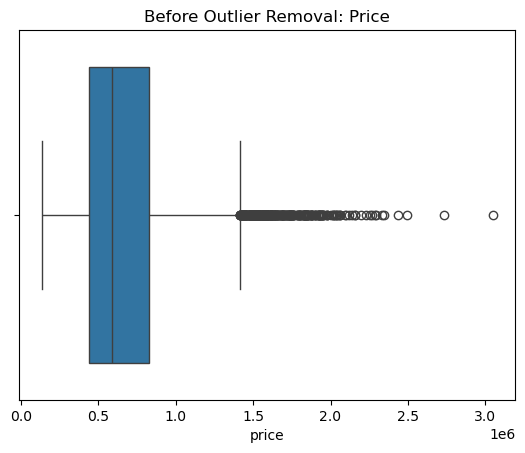

In [78]:
# Before removing outliers
sns.boxplot(x=df['price'])
plt.title("Before Outlier Removal: Price")
plt.show()

In [79]:
from scipy.stats import zscore
import numpy as np

def remove_outliers_zscore(df, column, threshold=3):
    df = df.copy()
    df[f'{column}_Zscore'] = np.abs(zscore(df[column]))
    
    outliers = df[df[f'{column}_Zscore'] > threshold]
    cleaned_df = df[df[f'{column}_Zscore'] <= threshold].drop(columns=[f'{column}_Zscore'])

    print(f"\n- Column: {column}")
    print(f"   - Z-score Threshold: {threshold}")
    print(f"   - Outliers Removed: {outliers.shape[0]}")
    print(f"   - Remaining Rows  : {cleaned_df.shape[0]}")
    
    return cleaned_df

In [80]:
df = remove_outliers_zscore(df, 'price')


- Column: price
   - Z-score Threshold: 3
   - Outliers Removed: 116
   - Remaining Rows  : 6306


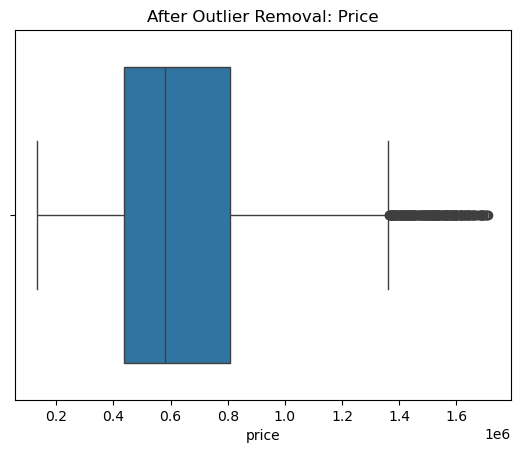

In [81]:
# After removing outliers
sns.boxplot(x=df['price'])
plt.title("After Outlier Removal: Price")
plt.show()

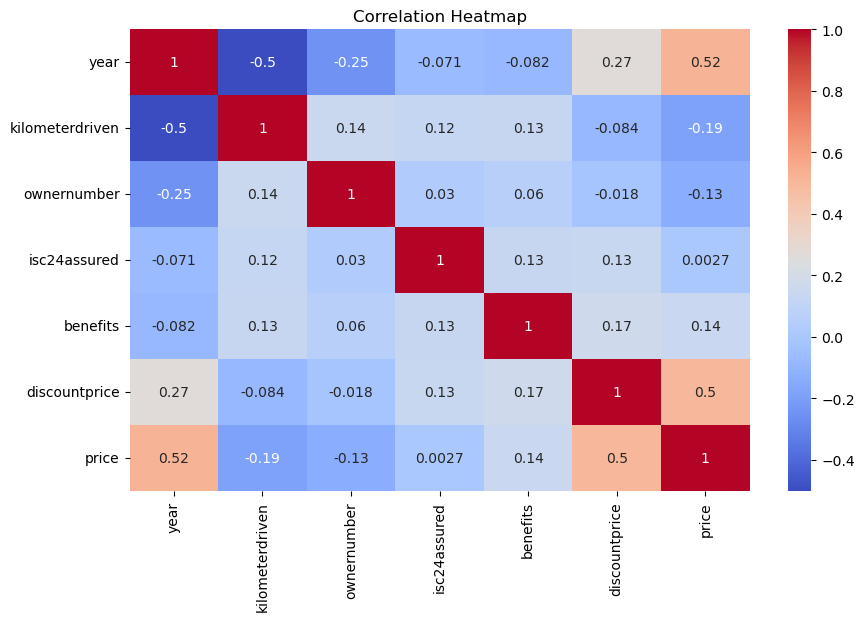

In [82]:
# Plot correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

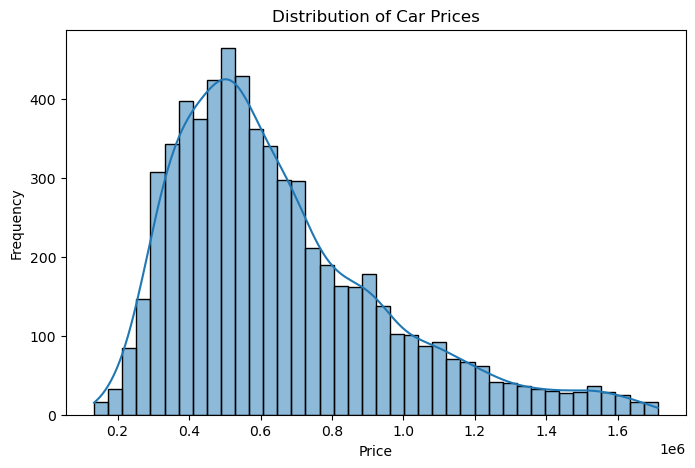

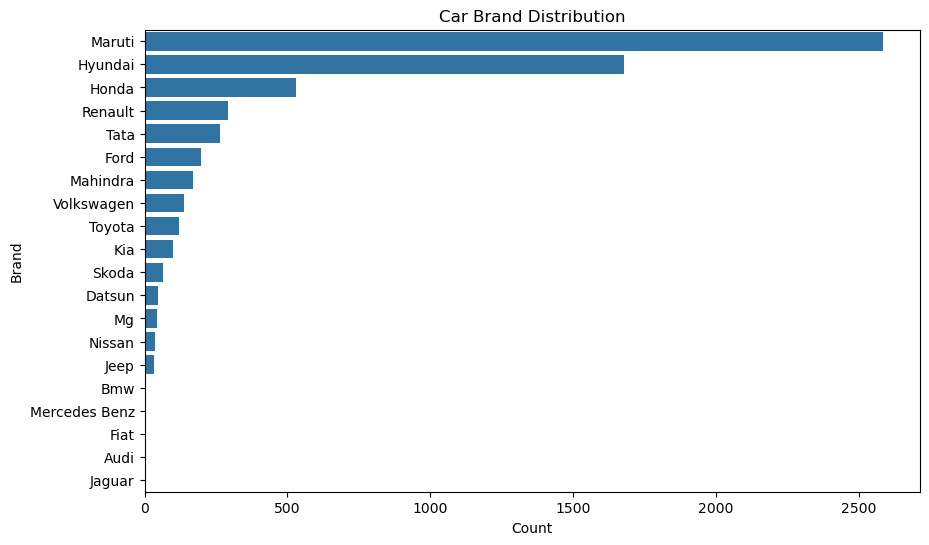

In [83]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='make', data=df, order=df['make'].value_counts().index)
plt.title('Car Brand Distribution')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

In [84]:
df.columns

Index(['name', 'make', 'model', 'city', 'year', 'fueltype', 'kilometerdriven',
       'ownernumber', 'transmission', 'bodytype', 'storename', 'isc24assured',
       'registrationcity', 'registrationstate', 'benefits', 'discountprice',
       'price', 'url', 'createdDate'],
      dtype='object')

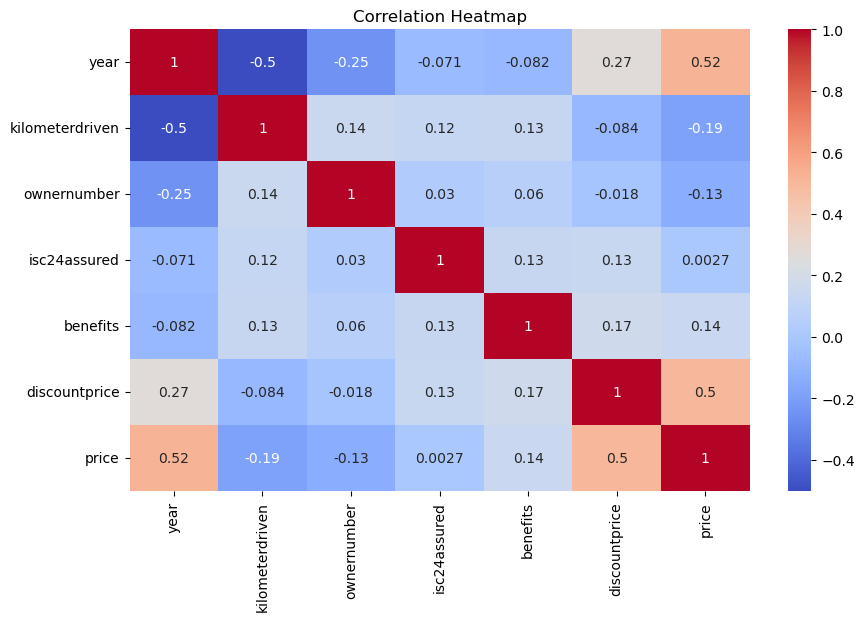

In [85]:
# Plot correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

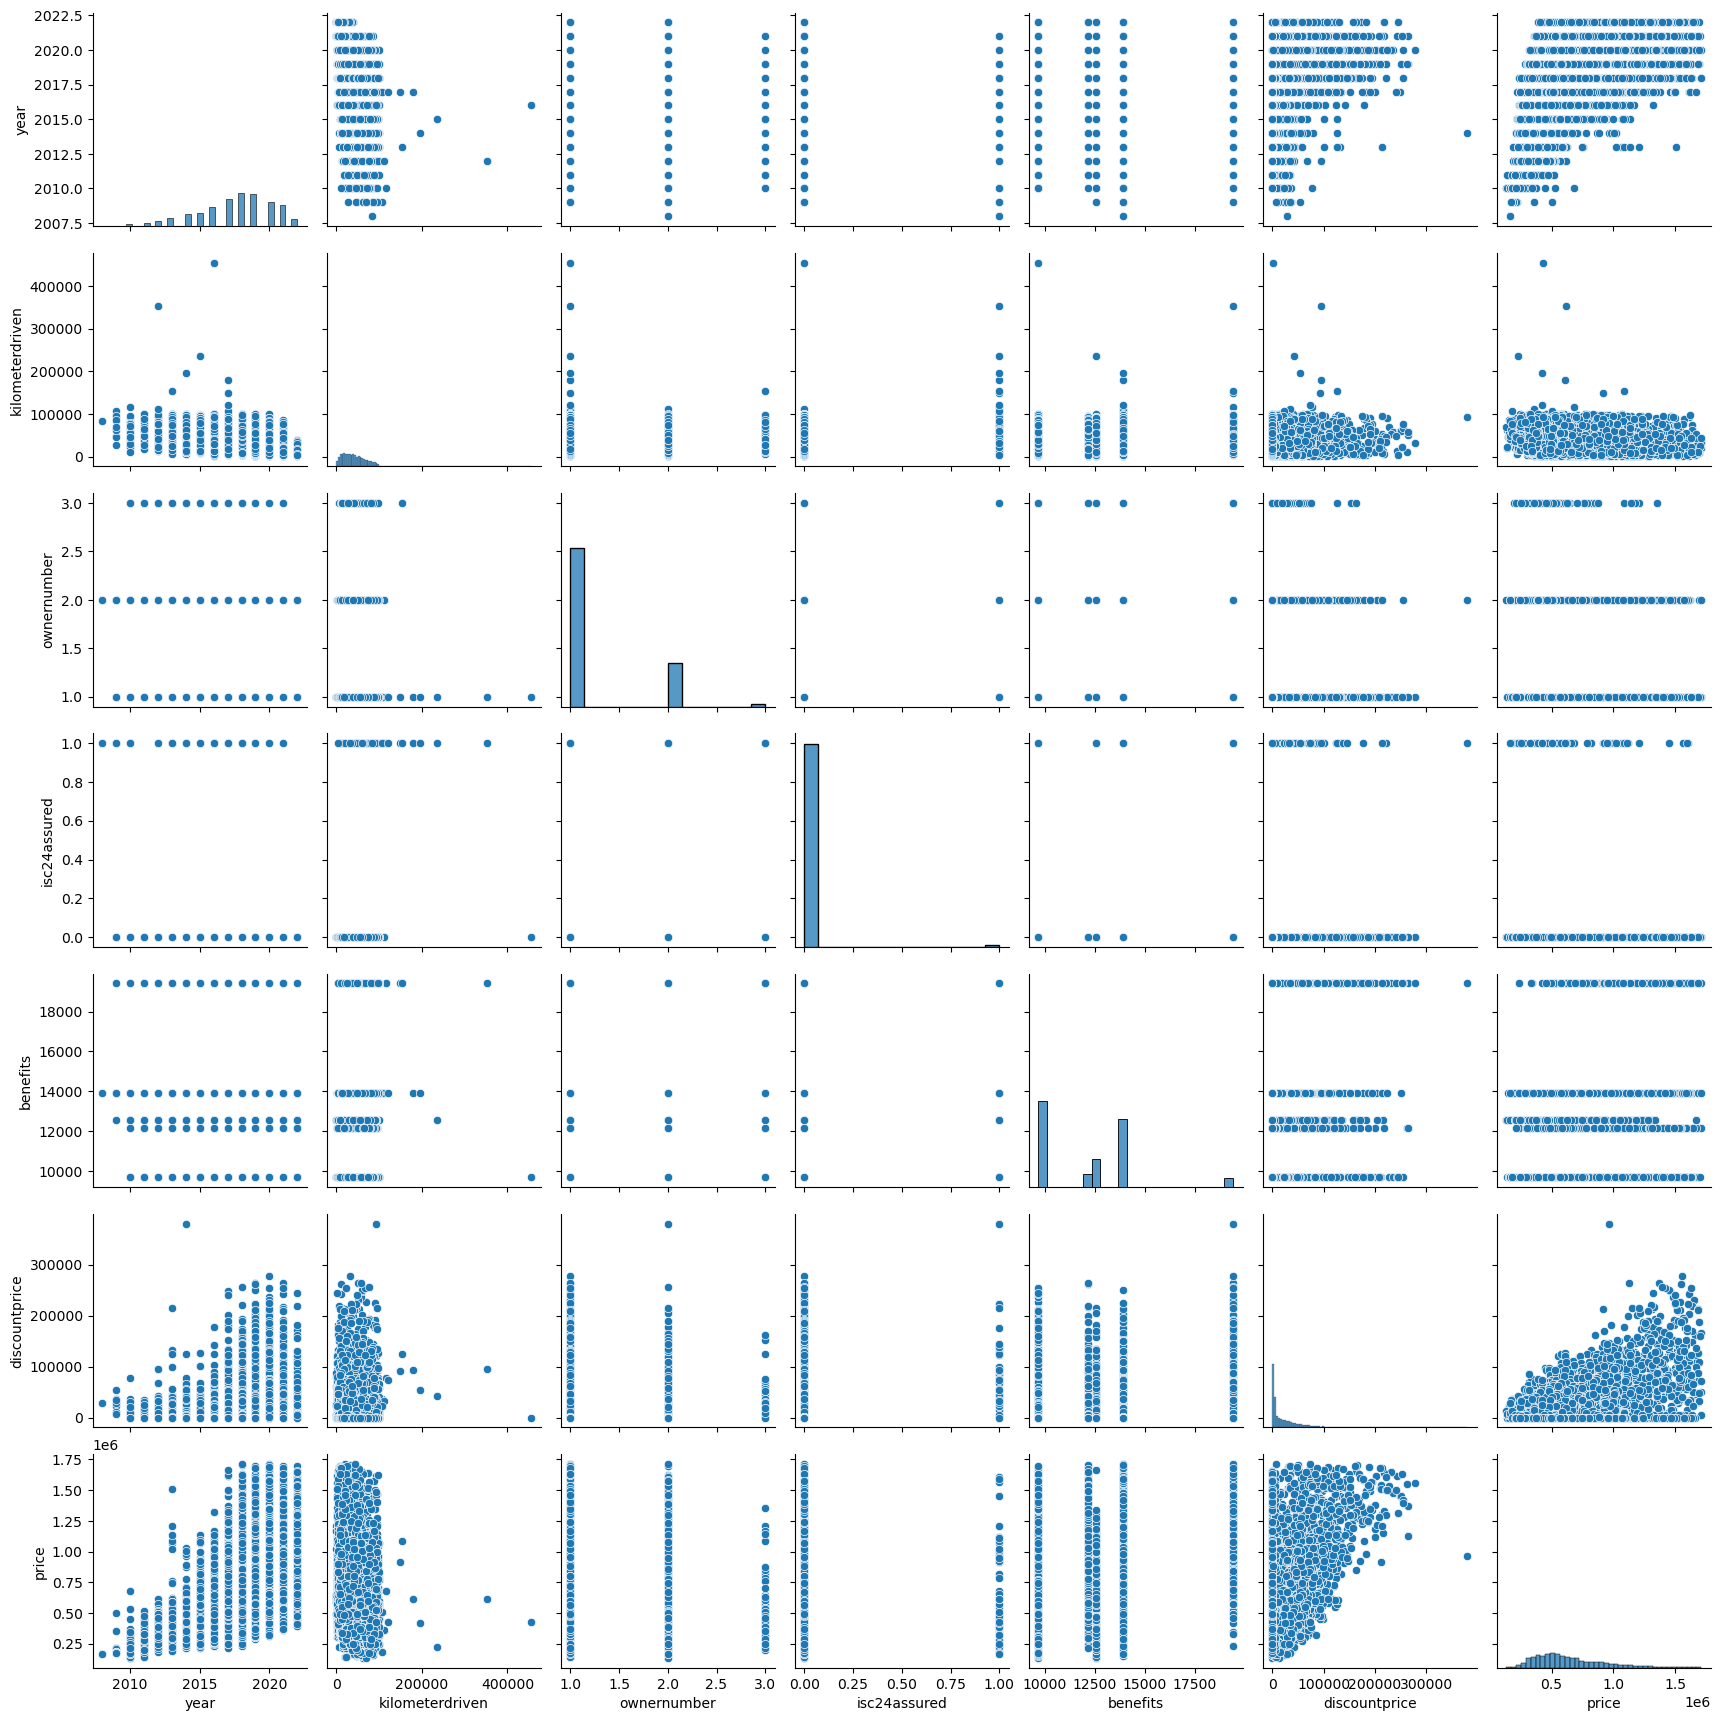

In [86]:
sns.pairplot(df)
plt.show()

In [87]:
df

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,storename,isc24assured,registrationcity,registrationstate,benefits,discountprice,price,url,createdDate
0,Hyundai Elite i20,Hyundai,Elite I20,Kochi,2017,Petrol,35939,2,Manual,Hatchback,Kochi-Pns,False,Kozhikode,Kerala,13898,47399,607000,https://www.cars24.com/buy-used-hyundai-elite-...,2022-03-24
1,Maruti Alto 800,Maruti,Alto 800,Mumbai,2016,Petrol + Cng,6180,1,Manual,Hatchback,Hi-West Mumbai,False,Mumbai,Maharashtra,12542,2099,326000,https://www.cars24.com/buy-used-maruti-alto-80...,2022-11-09
2,Maruti Dzire,Maruti,Dzire,Lucknow,2019,Petrol + Cng,46808,1,Manual,Sedan,Vibhuti Khand - Gomti Nagar,False,Lucknow,Uttar Pradesh,13898,26000,640000,https://www.cars24.com/buy-used-maruti-dzire-2...,2022-09-30
3,KIA SELTOS,Kia,Seltos,Bangalore,2020,Diesel,26045,1,Manual,SUV,Bengaluru-Pns,False,Bengaluru,Karnataka,9688,143700,1354000,https://www.cars24.com/buy-used-kia-seltos-202...,2022-07-04
4,Maruti Ertiga,Maruti,Ertiga,Kolkata,2017,Petrol,53056,1,Manual,SUV,Hi-Kolkata,False,Barrackpore,West Bengal,13898,22800,676000,https://www.cars24.com/buy-used-maruti-ertiga-...,2022-10-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6432,Mahindra XUV500,Mahindra,Xuv500,Hyderabad,2013,Diesel,74570,2,Manual,SUV,Hi-West Hyd,False,Hyderabad,Telangana,9688,0,744000,https://www.cars24.com/buy-used-mahindra-xuv50...,2022-12-09
6433,Renault Kwid,Renault,Kwid,Chandigarh,2017,Petrol,39981,2,Manual,Hatchback,Chandigarh-Pns,False,Faridabad,Haryana,12542,0,248000,https://www.cars24.com/buy-used-renault-kwid-2...,2022-12-10
6434,Hyundai i10,Hyundai,I10,Hyderabad,2014,Petrol,61249,1,Manual,Hatchback,Hi-West 2 Hyd,False,Hyderabad,Telangana,13898,0,351000,https://www.cars24.com/buy-used-hyundai-i10-20...,2022-12-10
6435,Maruti Swift Dzire,Maruti,Swift Dzire,Hyderabad,2014,Petrol,48081,1,Manual,Sedan,Hi-West 2 Hyd,False,Hyderabad,Telangana,13898,0,494000,https://www.cars24.com/buy-used-maruti-swift-d...,2022-12-10


In [88]:
print(df['fueltype'].unique())

['Petrol' 'Petrol + Cng' 'Diesel']


In [89]:
# Mapping dictionary
fuel_map = {
    'Petrol': 1,
    'Petrol + Cng': 2,
    'Diesel': 3
}

# Add new column 'fueltype_num' without changing original 'fueltype'
df['fueltype_num'] = (
    df['fueltype']
    .str.strip()          # Remove extra spaces
    .str.title()          # Standardize case
    .map(fuel_map)        # Map to numeric codes
)

# View first few rows
print(df.head())


                name     make      model       city  year      fueltype  \
0  Hyundai Elite i20  Hyundai  Elite I20      Kochi  2017        Petrol   
1    Maruti Alto 800   Maruti   Alto 800     Mumbai  2016  Petrol + Cng   
2       Maruti Dzire   Maruti      Dzire    Lucknow  2019  Petrol + Cng   
3         KIA SELTOS      Kia     Seltos  Bangalore  2020        Diesel   
4      Maruti Ertiga   Maruti     Ertiga    Kolkata  2017        Petrol   

   kilometerdriven  ownernumber transmission   bodytype  \
0            35939            2       Manual  Hatchback   
1             6180            1       Manual  Hatchback   
2            46808            1       Manual      Sedan   
3            26045            1       Manual        SUV   
4            53056            1       Manual        SUV   

                     storename  isc24assured registrationcity  \
0                    Kochi-Pns         False        Kozhikode   
1               Hi-West Mumbai         False           Mumbai   

In [90]:
df

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,storename,isc24assured,registrationcity,registrationstate,benefits,discountprice,price,url,createdDate,fueltype_num
0,Hyundai Elite i20,Hyundai,Elite I20,Kochi,2017,Petrol,35939,2,Manual,Hatchback,Kochi-Pns,False,Kozhikode,Kerala,13898,47399,607000,https://www.cars24.com/buy-used-hyundai-elite-...,2022-03-24,1
1,Maruti Alto 800,Maruti,Alto 800,Mumbai,2016,Petrol + Cng,6180,1,Manual,Hatchback,Hi-West Mumbai,False,Mumbai,Maharashtra,12542,2099,326000,https://www.cars24.com/buy-used-maruti-alto-80...,2022-11-09,2
2,Maruti Dzire,Maruti,Dzire,Lucknow,2019,Petrol + Cng,46808,1,Manual,Sedan,Vibhuti Khand - Gomti Nagar,False,Lucknow,Uttar Pradesh,13898,26000,640000,https://www.cars24.com/buy-used-maruti-dzire-2...,2022-09-30,2
3,KIA SELTOS,Kia,Seltos,Bangalore,2020,Diesel,26045,1,Manual,SUV,Bengaluru-Pns,False,Bengaluru,Karnataka,9688,143700,1354000,https://www.cars24.com/buy-used-kia-seltos-202...,2022-07-04,3
4,Maruti Ertiga,Maruti,Ertiga,Kolkata,2017,Petrol,53056,1,Manual,SUV,Hi-Kolkata,False,Barrackpore,West Bengal,13898,22800,676000,https://www.cars24.com/buy-used-maruti-ertiga-...,2022-10-28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6432,Mahindra XUV500,Mahindra,Xuv500,Hyderabad,2013,Diesel,74570,2,Manual,SUV,Hi-West Hyd,False,Hyderabad,Telangana,9688,0,744000,https://www.cars24.com/buy-used-mahindra-xuv50...,2022-12-09,3
6433,Renault Kwid,Renault,Kwid,Chandigarh,2017,Petrol,39981,2,Manual,Hatchback,Chandigarh-Pns,False,Faridabad,Haryana,12542,0,248000,https://www.cars24.com/buy-used-renault-kwid-2...,2022-12-10,1
6434,Hyundai i10,Hyundai,I10,Hyderabad,2014,Petrol,61249,1,Manual,Hatchback,Hi-West 2 Hyd,False,Hyderabad,Telangana,13898,0,351000,https://www.cars24.com/buy-used-hyundai-i10-20...,2022-12-10,1
6435,Maruti Swift Dzire,Maruti,Swift Dzire,Hyderabad,2014,Petrol,48081,1,Manual,Sedan,Hi-West 2 Hyd,False,Hyderabad,Telangana,13898,0,494000,https://www.cars24.com/buy-used-maruti-swift-d...,2022-12-10,1


In [91]:
df.fueltype_num.unique()

array([1, 2, 3], dtype=int64)

In [94]:
unique_transmissions = df['transmission'].unique()
unique_transmissions

array(['Manual', 'Automatic', 'Unknown'], dtype=object)

In [95]:
transmission_counts = df['transmission'].value_counts()

print(transmission_counts)

transmission
Manual       4964
Automatic     995
Unknown       347
Name: count, dtype: int64


In [99]:


# Mapping dictionary
transmission_map = {
    'Manual': 1,
    'Automatic': 2,
    'Unknown': 0
}

# Add new column 'transmission_num'
df['transmission_num'] = (
    df['transmission']
    .str.strip()               # Remove extra spaces
    .str.title()               # Standardize case
    .map(transmission_map)     # Map to numeric codes
)

# View first few rows
print(df[['transmission', 'transmission_num']].head())


df


  transmission  transmission_num
0       Manual                 1
1       Manual                 1
2       Manual                 1
3       Manual                 1
4       Manual                 1


,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,...,isc24assured,registrationcity,registrationstate,benefits,discountprice,price,url,createdDate,fueltype_num,transmission_num
0,Hyundai Elite i20,Hyundai,Elite I20,Kochi,2017,Petrol,35939,2,Manual,Hatchback,...,False,Kozhikode,Kerala,13898,47399,607000,https://www.cars24.com/buy-used-hyundai-elite-...,2022-03-24,1,1
1,Maruti Alto 800,Maruti,Alto 800,Mumbai,2016,Petrol + Cng,6180,1,Manual,Hatchback,...,False,Mumbai,Maharashtra,12542,2099,326000,https://www.cars24.com/buy-used-maruti-alto-80...,2022-11-09,2,1
2,Maruti Dzire,Maruti,Dzire,Lucknow,2019,Petrol + Cng,46808,1,Manual,Sedan,...,False,Lucknow,Uttar Pradesh,13898,26000,640000,https://www.cars24.com/buy-used-maruti-dzire-2...,2022-09-30,2,1
3,KIA SELTOS,Kia,Seltos,Bangalore,2020,Diesel,26045,1,Manual,SUV,...,False,Bengaluru,Karnataka,9688,143700,1354000,https://www.cars24.com/buy-used-kia-seltos-202...,2022-07-04,3,1
4,Maruti Ertiga,Maruti,Ertiga,Kolkata,2017,Petrol,53056,1,Manual,SUV,...,False,Barrackpore,West Bengal,13898,22800,676000,https://www.cars24.com/buy-used-maruti-ertiga-...,2022-10-28,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6432,Mahindra XUV500,Mahindra,Xuv500,Hyderabad,2013,Diesel,74570,2,Manual,SUV,...,False,Hyderabad,Telangana,9688,0,744000,https://www.cars24.com/buy-used-mahindra-xuv50...,2022-12-09,3,1
6433,Renault Kwid,Renault,Kwid,Chandigarh,2017,Petrol,39981,2,Manual,Hatchback,...,False,Faridabad,Haryana,12542,0,248000,https://www.cars24.com/buy-used-renault-kwid-2...,2022-12-10,1,1
6434,Hyundai i10,Hyundai,I10,Hyderabad,2014,Petrol,61249,1,Manual,Hatchback,...,False,Hyderabad,Telangana,13898,0,351000,https://www.cars24.com/buy-used-hyundai-i10-20...,2022-12-10,1,1
6435,Maruti Swift Dzire,Maruti,Swift Dzire,Hyderabad,2014,Petrol,48081,1,Manual,Sedan,...,False,Hyderabad,Telangana,13898,0,494000,https://www.cars24.com/buy-used-maruti-swift-d...,2022-12-10,1,1


In [100]:
df

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,...,isc24assured,registrationcity,registrationstate,benefits,discountprice,price,url,createdDate,fueltype_num,transmission_num
0,Hyundai Elite i20,Hyundai,Elite I20,Kochi,2017,Petrol,35939,2,Manual,Hatchback,...,False,Kozhikode,Kerala,13898,47399,607000,https://www.cars24.com/buy-used-hyundai-elite-...,2022-03-24,1,1
1,Maruti Alto 800,Maruti,Alto 800,Mumbai,2016,Petrol + Cng,6180,1,Manual,Hatchback,...,False,Mumbai,Maharashtra,12542,2099,326000,https://www.cars24.com/buy-used-maruti-alto-80...,2022-11-09,2,1
2,Maruti Dzire,Maruti,Dzire,Lucknow,2019,Petrol + Cng,46808,1,Manual,Sedan,...,False,Lucknow,Uttar Pradesh,13898,26000,640000,https://www.cars24.com/buy-used-maruti-dzire-2...,2022-09-30,2,1
3,KIA SELTOS,Kia,Seltos,Bangalore,2020,Diesel,26045,1,Manual,SUV,...,False,Bengaluru,Karnataka,9688,143700,1354000,https://www.cars24.com/buy-used-kia-seltos-202...,2022-07-04,3,1
4,Maruti Ertiga,Maruti,Ertiga,Kolkata,2017,Petrol,53056,1,Manual,SUV,...,False,Barrackpore,West Bengal,13898,22800,676000,https://www.cars24.com/buy-used-maruti-ertiga-...,2022-10-28,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6432,Mahindra XUV500,Mahindra,Xuv500,Hyderabad,2013,Diesel,74570,2,Manual,SUV,...,False,Hyderabad,Telangana,9688,0,744000,https://www.cars24.com/buy-used-mahindra-xuv50...,2022-12-09,3,1
6433,Renault Kwid,Renault,Kwid,Chandigarh,2017,Petrol,39981,2,Manual,Hatchback,...,False,Faridabad,Haryana,12542,0,248000,https://www.cars24.com/buy-used-renault-kwid-2...,2022-12-10,1,1
6434,Hyundai i10,Hyundai,I10,Hyderabad,2014,Petrol,61249,1,Manual,Hatchback,...,False,Hyderabad,Telangana,13898,0,351000,https://www.cars24.com/buy-used-hyundai-i10-20...,2022-12-10,1,1
6435,Maruti Swift Dzire,Maruti,Swift Dzire,Hyderabad,2014,Petrol,48081,1,Manual,Sedan,...,False,Hyderabad,Telangana,13898,0,494000,https://www.cars24.com/buy-used-maruti-swift-d...,2022-12-10,1,1


In [102]:


# Add new column with 1 for True, 0 for False
df['isc24assured_num'] = df['isc24assured'].astype(int)

# Show first few rows
print(df[['isc24assured', 'isc24assured_num']].head())


   isc24assured  isc24assured_num
0         False                 0
1         False                 0
2         False                 0
3         False                 0
4         False                 0


In [103]:
df

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,...,registrationcity,registrationstate,benefits,discountprice,price,url,createdDate,fueltype_num,transmission_num,isc24assured_num
0,Hyundai Elite i20,Hyundai,Elite I20,Kochi,2017,Petrol,35939,2,Manual,Hatchback,...,Kozhikode,Kerala,13898,47399,607000,https://www.cars24.com/buy-used-hyundai-elite-...,2022-03-24,1,1,0
1,Maruti Alto 800,Maruti,Alto 800,Mumbai,2016,Petrol + Cng,6180,1,Manual,Hatchback,...,Mumbai,Maharashtra,12542,2099,326000,https://www.cars24.com/buy-used-maruti-alto-80...,2022-11-09,2,1,0
2,Maruti Dzire,Maruti,Dzire,Lucknow,2019,Petrol + Cng,46808,1,Manual,Sedan,...,Lucknow,Uttar Pradesh,13898,26000,640000,https://www.cars24.com/buy-used-maruti-dzire-2...,2022-09-30,2,1,0
3,KIA SELTOS,Kia,Seltos,Bangalore,2020,Diesel,26045,1,Manual,SUV,...,Bengaluru,Karnataka,9688,143700,1354000,https://www.cars24.com/buy-used-kia-seltos-202...,2022-07-04,3,1,0
4,Maruti Ertiga,Maruti,Ertiga,Kolkata,2017,Petrol,53056,1,Manual,SUV,...,Barrackpore,West Bengal,13898,22800,676000,https://www.cars24.com/buy-used-maruti-ertiga-...,2022-10-28,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6432,Mahindra XUV500,Mahindra,Xuv500,Hyderabad,2013,Diesel,74570,2,Manual,SUV,...,Hyderabad,Telangana,9688,0,744000,https://www.cars24.com/buy-used-mahindra-xuv50...,2022-12-09,3,1,0
6433,Renault Kwid,Renault,Kwid,Chandigarh,2017,Petrol,39981,2,Manual,Hatchback,...,Faridabad,Haryana,12542,0,248000,https://www.cars24.com/buy-used-renault-kwid-2...,2022-12-10,1,1,0
6434,Hyundai i10,Hyundai,I10,Hyderabad,2014,Petrol,61249,1,Manual,Hatchback,...,Hyderabad,Telangana,13898,0,351000,https://www.cars24.com/buy-used-hyundai-i10-20...,2022-12-10,1,1,0
6435,Maruti Swift Dzire,Maruti,Swift Dzire,Hyderabad,2014,Petrol,48081,1,Manual,Sedan,...,Hyderabad,Telangana,13898,0,494000,https://www.cars24.com/buy-used-maruti-swift-d...,2022-12-10,1,1,0


In [104]:
unique_values = df['isc24assured_num'].unique()
print("Unique values in isc24assured_num:", unique_values)

Unique values in isc24assured_num: [0 1]


In [106]:
from datetime import datetime
# Current year
current_year = datetime.now().year

# Create 'age' column
df['age'] = current_year - df['year']

# View first few rows
print(df[['year', 'age']].head())

   year  age
0  2017    8
1  2016    9
2  2019    6
3  2020    5
4  2017    8


In [107]:
df

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,...,registrationstate,benefits,discountprice,price,url,createdDate,fueltype_num,transmission_num,isc24assured_num,age
0,Hyundai Elite i20,Hyundai,Elite I20,Kochi,2017,Petrol,35939,2,Manual,Hatchback,...,Kerala,13898,47399,607000,https://www.cars24.com/buy-used-hyundai-elite-...,2022-03-24,1,1,0,8
1,Maruti Alto 800,Maruti,Alto 800,Mumbai,2016,Petrol + Cng,6180,1,Manual,Hatchback,...,Maharashtra,12542,2099,326000,https://www.cars24.com/buy-used-maruti-alto-80...,2022-11-09,2,1,0,9
2,Maruti Dzire,Maruti,Dzire,Lucknow,2019,Petrol + Cng,46808,1,Manual,Sedan,...,Uttar Pradesh,13898,26000,640000,https://www.cars24.com/buy-used-maruti-dzire-2...,2022-09-30,2,1,0,6
3,KIA SELTOS,Kia,Seltos,Bangalore,2020,Diesel,26045,1,Manual,SUV,...,Karnataka,9688,143700,1354000,https://www.cars24.com/buy-used-kia-seltos-202...,2022-07-04,3,1,0,5
4,Maruti Ertiga,Maruti,Ertiga,Kolkata,2017,Petrol,53056,1,Manual,SUV,...,West Bengal,13898,22800,676000,https://www.cars24.com/buy-used-maruti-ertiga-...,2022-10-28,1,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6432,Mahindra XUV500,Mahindra,Xuv500,Hyderabad,2013,Diesel,74570,2,Manual,SUV,...,Telangana,9688,0,744000,https://www.cars24.com/buy-used-mahindra-xuv50...,2022-12-09,3,1,0,12
6433,Renault Kwid,Renault,Kwid,Chandigarh,2017,Petrol,39981,2,Manual,Hatchback,...,Haryana,12542,0,248000,https://www.cars24.com/buy-used-renault-kwid-2...,2022-12-10,1,1,0,8
6434,Hyundai i10,Hyundai,I10,Hyderabad,2014,Petrol,61249,1,Manual,Hatchback,...,Telangana,13898,0,351000,https://www.cars24.com/buy-used-hyundai-i10-20...,2022-12-10,1,1,0,11
6435,Maruti Swift Dzire,Maruti,Swift Dzire,Hyderabad,2014,Petrol,48081,1,Manual,Sedan,...,Telangana,13898,0,494000,https://www.cars24.com/buy-used-maruti-swift-d...,2022-12-10,1,1,0,11


In [108]:
df['benefits'].unique()

array([13898, 12542,  9688, 19407, 12188], dtype=int64)

In [109]:
df_model = df[['name', 'make', 'model', 'kilometerdriven', 'ownernumber',
                  'price', 'fueltype_num', 'transmission_num', 'isc24assured_num', 'age']]

In [110]:
df_model

,name,make,model,kilometerdriven,ownernumber,price,fueltype_num,transmission_num,isc24assured_num,age
0,Hyundai Elite i20,Hyundai,Elite I20,35939,2,607000,1,1,0,8
1,Maruti Alto 800,Maruti,Alto 800,6180,1,326000,2,1,0,9
2,Maruti Dzire,Maruti,Dzire,46808,1,640000,2,1,0,6
3,KIA SELTOS,Kia,Seltos,26045,1,1354000,3,1,0,5
4,Maruti Ertiga,Maruti,Ertiga,53056,1,676000,1,1,0,8
...,...,...,...,...,...,...,...,...,...,...
6432,Mahindra XUV500,Mahindra,Xuv500,74570,2,744000,3,1,0,12
6433,Renault Kwid,Renault,Kwid,39981,2,248000,1,1,0,8
6434,Hyundai i10,Hyundai,I10,61249,1,351000,1,1,0,11
6435,Maruti Swift Dzire,Maruti,Swift Dzire,48081,1,494000,1,1,0,11


In [112]:
df_model.to_csv("df_model.csv", index=False)
save_path = r"C:\Users\Thavamani\Desktop\ExcelR-Project1\df_model.csv"  # Change to your desired location

# Save to CSV
df_model.to_csv(save_path, index=False)

print(f"df_model saved to: {save_path}")

df_model saved to: C:\Users\Thavamani\Desktop\ExcelR-Project1\df_model.csv


In [124]:
pip install xgboost


   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   - -------------------------------------- 4.2/149.9 MB 25.2 MB/s eta 0:00:06
   -- ------------------------------------- 10.0/149.9 MB 25.9 MB/s eta 0:00:06
   ---- ----------------------------------- 15.7/149.9 MB 27.5 MB/s eta 0:00:05
   ----- ---------------------------------- 21.5/149.9 MB 26.1 MB/s eta 0:00:05
   ------- -------------------------------- 27.3/149.9 MB 26.6 MB/s eta 0:00:05
   ------- -------------------------------- 29.6/149.9 MB 25.8 MB/s eta 0:00:05
   -------- ------------------------------- 31.7/149.9 MB 21.9 MB/s eta 0:00:06
   ---------- ----------------------------- 39.1/149.9 MB 23.4 MB/s eta 0:00:05
   ----------- ---------------------------- 42.7/149.9 MB 22.6 MB/s eta 0:00:05
   ------------- -------------------------- 48.8/149.9 MB 23.3 MB/s eta 0:00:05
   -------------- ------------------------- 53.0/149.9 MB 23.6 MB/s eta 0:00:05
   -------------- ------------------------- 55.6/1

Price bin distribution overall:
price
0    619
1    619
2    621
3    617
4    614
5    618
6    618
7    617
8    620
9    616
Name: count, dtype: int64

Train label distribution:
price
0    495
1    495
2    497
3    494
4    491
5    494
6    494
7    494
8    496
9    493
Name: count, dtype: int64

Test label distribution:
price
0    124
1    124
2    124
3    123
4    123
5    124
6    124
7    123
8    124
9    123
Name: count, dtype: int64

🔍 Running hyperparameter search...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Thavamani\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:42:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Parameters: {'xgb__colsample_bytree': 0.6179530172975406, 'xgb__gamma': 0.3310410207345795, 'xgb__learning_rate': 0.03826417589882414, 'xgb__max_delta_step': 6, 'xgb__max_depth': 12, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 1066, 'xgb__reg_alpha': 0.45479124175422525, 'xgb__reg_lambda': 2.3236831813827763, 'xgb__scale_pos_weight': 1.2551668380626586, 'xgb__subsample': 0.8721248259216444}
Best CV F1 Macro Score: 0.7721
[0]	validation_0-mlogloss:2.26470


C:\Users\Thavamani\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:42:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[10]	validation_0-mlogloss:1.96301
[20]	validation_0-mlogloss:1.77495
[30]	validation_0-mlogloss:1.58977
[40]	validation_0-mlogloss:1.47066
[50]	validation_0-mlogloss:1.35362
[60]	validation_0-mlogloss:1.26413
[70]	validation_0-mlogloss:1.18435
[80]	validation_0-mlogloss:1.12247
[90]	validation_0-mlogloss:1.05913
[100]	validation_0-mlogloss:1.00786
[110]	validation_0-mlogloss:0.96753
[120]	validation_0-mlogloss:0.92995
[130]	validation_0-mlogloss:0.90207
[140]	validation_0-mlogloss:0.87378
[150]	validation_0-mlogloss:0.84488
[160]	validation_0-mlogloss:0.82398
[170]	validation_0-mlogloss:0.80089
[180]	validation_0-mlogloss:0.78031
[190]	validation_0-mlogloss:0.76622
[200]	validation_0-mlogloss:0.75279
[210]	validation_0-mlogloss:0.73982
[220]	validation_0-mlogloss:0.72542
[230]	validation_0-mlogloss:0.71468
[240]	validation_0-mlogloss:0.70591
[250]	validation_0-mlogloss:0.69628
[260]	validation_0-mlogloss:0.68883
[270]	validation_0-mlogloss:0.68212
[280]	validation_0-mlogloss:0.67568
[

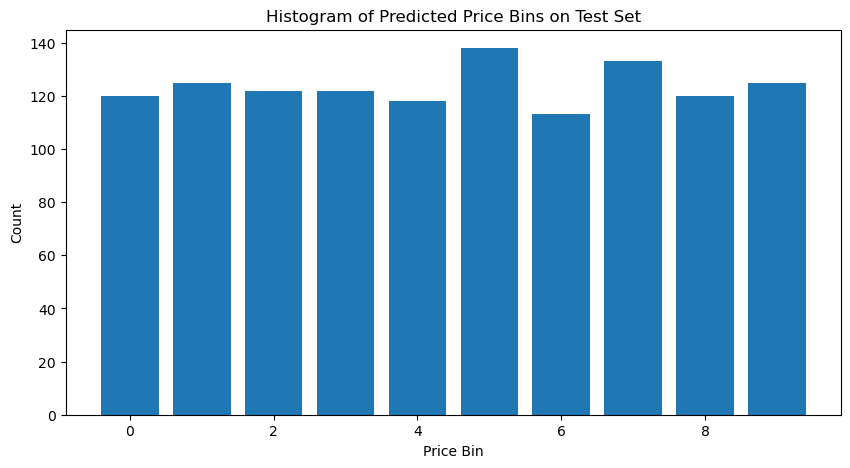


💾 Model saved at: C:\Users\Thavamani\Desktop\ExcelR-Project1\best_price_classifier_xgb_10bins.joblib


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, f1_score
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
import joblib
import matplotlib.pyplot as plt

# === Load dataset ===
df = pd.read_csv(r"C:\Users\Thavamani\Desktop\ExcelR-Project1\df_model.csv")

# Basic cleaning
df = df[(df['kilometerdriven'] > 0) & (df['kilometerdriven'] < df['kilometerdriven'].quantile(0.99))]
df = df[(df['price'] > 0) & (df['price'] < df['price'].quantile(0.99))]

# Feature engineering
df['km_per_age'] = df['kilometerdriven'] / df['age'].replace(0, np.nan)
df['price_per_km'] = df['price'] / (df['kilometerdriven'] + 1)
df['log_km'] = np.log1p(df['kilometerdriven'])
df['log_age'] = np.log1p(df['age'] + 1)
df['age_squared'] = df['age'] ** 2
df['km_age_interaction'] = df['kilometerdriven'] * df['age']

FEATURES = [
    'kilometerdriven', 'ownernumber', 'fueltype_num',
    'transmission_num', 'isc24assured_num', 'age', 'km_per_age',
    'price_per_km', 'log_km', 'log_age', 'age_squared', 'km_age_interaction'
]

for col in FEATURES:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=['price'])

# Create 10 quantile bins for price (target classes 0-9)
num_bins = 10
y = pd.qcut(df['price'], q=num_bins, labels=False).astype(int)
X = df[FEATURES]

print("Price bin distribution overall:")
print(pd.Series(y).value_counts().sort_index())

# Train/Test Split with stratification on bins
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("\nTrain label distribution:")
print(pd.Series(y_train).value_counts().sort_index())

print("\nTest label distribution:")
print(pd.Series(y_test).value_counts().sort_index())

# Pipeline with imputer + XGBClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('xgb', XGBClassifier(
        objective='multi:softprob',
        num_class=num_bins,
        random_state=42,
        eval_metric='mlogloss',
        tree_method='hist',
        n_jobs=-1,
        use_label_encoder=False
    ))
])

# Hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'xgb__n_estimators': randint(500, 2000),
    'xgb__max_depth': randint(4, 20),
    'xgb__learning_rate': uniform(0.001, 0.2),
    'xgb__subsample': uniform(0.5, 0.5),
    'xgb__colsample_bytree': uniform(0.5, 0.5),
    'xgb__min_child_weight': randint(1, 15),
    'xgb__gamma': uniform(0, 2.0),
    'xgb__reg_lambda': uniform(0.5, 3.0),
    'xgb__reg_alpha': uniform(0, 2.0),
    'xgb__scale_pos_weight': uniform(0.8, 1.2),
    'xgb__max_delta_step': randint(0, 10)
}

# StratifiedKFold for CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1_macro',
    cv=cv,
    verbose=3,
    n_jobs=-1,
    random_state=42,
    refit=True
)

print("\n🔍 Running hyperparameter search...")
search.fit(X_train, y_train)

print(f"\nBest Parameters: {search.best_params_}")
print(f"Best CV F1 Macro Score: {search.best_score_:.4f}")

best_pipeline = search.best_estimator_

# === Fit pipeline with early stopping ===
def fit_with_early_stopping(pipeline, X_train, y_train, X_val, y_val):
    # Fit imputer on train and transform both train and val
    X_train_imputed = pipeline.named_steps['imputer'].fit_transform(X_train)
    X_val_imputed = pipeline.named_steps['imputer'].transform(X_val)
    
    xgb = pipeline.named_steps['xgb']
    xgb.set_params(early_stopping_rounds=30, eval_metric='mlogloss', use_label_encoder=False)
    
    xgb.fit(
        X_train_imputed, y_train,
        eval_set=[(X_val_imputed, y_val)],
        verbose=10
    )
    return pipeline

best_pipeline = fit_with_early_stopping(best_pipeline, X_train, y_train, X_test, y_test)

# Predict on test set
y_pred = best_pipeline.predict(X_test)

print("\nUnique predicted bins after final fit:", np.unique(y_pred))

# Metrics
test_acc = accuracy_score(y_test, y_pred)
test_f1_macro = f1_score(y_test, y_pred, average='macro')

print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test F1 Macro: {test_f1_macro:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Check predicted probabilities distribution
probs = best_pipeline.named_steps['xgb'].predict_proba(
    best_pipeline.named_steps['imputer'].transform(X_test)
)

print(f"Predicted probabilities shape: {probs.shape}")

# Plot histogram of predicted classes to see spread
plt.figure(figsize=(10, 5))
plt.hist(np.argmax(probs, axis=1), bins=np.arange(num_bins+1)-0.5, rwidth=0.8)
plt.title("Histogram of Predicted Price Bins on Test Set")
plt.xlabel("Price Bin")
plt.ylabel("Count")
plt.show()

# Save full pipeline model
save_path = r"C:\Users\Thavamani\Desktop\ExcelR-Project1"
model_filename = f"{save_path}\\best_price_classifier_xgb_10bins.joblib"
joblib.dump(best_pipeline, model_filename)
print(f"\n💾 Model saved at: {model_filename}")


In [9]:
import joblib
import pandas as pd
import numpy as np

# === Load saved pipeline model ===
model_path = r"C:\Users\Thavamani\Desktop\ExcelR-Project1\best_price_classifier_xgb_10bins.joblib"
model = joblib.load(model_path)

# === New raw input values (change these to test) ===
input_data = {
    'kilometerdriven': 20000,      # moderate km driven
    'ownernumber': 1,              # fewer owners
    'fueltype_num': 1,             # diesel (or whatever encoding you used)
    'transmission_num': 0,         # automatic
    'isc24assured_num': 1,
    'age': 3                      # about 3 years old (not too old, not brand new)
}

# === Convert input to DataFrame ===
df_input = pd.DataFrame([input_data])

# === Feature engineering (must match training) ===
df_input['km_per_age'] = df_input['kilometerdriven'] / df_input['age'].replace(0, 1)  # avoid div by zero
df_input['price_per_km'] = 0  # unknown price, set placeholder 0
df_input['log_km'] = np.log1p(df_input['kilometerdriven'])
df_input['log_age'] = np.log1p(df_input['age'] + 1)
df_input['age_squared'] = df_input['age'] ** 2
df_input['km_age_interaction'] = df_input['kilometerdriven'] * df_input['age']

# === Select features in correct order ===
FEATURES = [
    'kilometerdriven', 'ownernumber', 'fueltype_num',
    'transmission_num', 'isc24assured_num', 'age', 'km_per_age',
    'price_per_km', 'log_km', 'log_age', 'age_squared', 'km_age_interaction'
]

df_input = df_input[FEATURES]

# Ensure all features are numeric (optional safety)
df_input = df_input.apply(pd.to_numeric, errors='coerce')

print("Input features to model:")
print(df_input)

# === Predict price bin ===
pred_class = model.predict(df_input)[0]
pred_probs = model.predict_proba(df_input)[0]

# === Hardcoded price bin ranges for 10 bins (in correct order) ===
price_bins = [
    (0, 50000),
    (50001, 150000),
    (150001, 250000),
    (250001, 350000),
    (350001, 450000),
    (450001, 600000),
    (600001, 900000),
    (900001, 1200000),
    (1200001, 1800000),
    (1800001, 4000000)
]

predicted_range = price_bins[pred_class]

print(f"\nPredicted Price Bin: {pred_class}")
print(f"Predicted Price Range: ₹{predicted_range[0]:,} to ₹{predicted_range[1]:,}")
print("Prediction Probabilities:")
for i, prob in enumerate(pred_probs):
    print(f"Class {i}: {prob:.3e}")

# === Calculate bin midpoints correctly for weighted average price ===
bin_centers = [(low + high) / 2 for (low, high) in price_bins]

# Weighted average price estimation
predicted_price = sum(prob * center for prob, center in zip(pred_probs, bin_centers))

print(f"\nEstimated Price (weighted average): ₹{predicted_price:,.2f}")


Input features to model:
   kilometerdriven  ownernumber  fueltype_num  transmission_num  \
0            20000            1             1                 0   

   isc24assured_num  age   km_per_age  price_per_km    log_km   log_age  \
0                 1    3  6666.666667             0  9.903538  1.609438   

   age_squared  km_age_interaction  
0            9               60000  

Predicted Price Bin: 0
Predicted Price Range: ₹0 to ₹50,000
Prediction Probabilities:
Class 0: 9.879e-01
Class 1: 4.166e-03
Class 2: 2.144e-03
Class 3: 6.445e-04
Class 4: 1.135e-03
Class 5: 6.541e-04
Class 6: 9.681e-04
Class 7: 5.479e-04
Class 8: 8.951e-04
Class 9: 9.261e-04

Estimated Price (weighted average): ₹31,863.60


In [12]:
# Define price bins and midpoints
price_bins = [
    (0, 50000),
    (50001, 150000),
    (150001, 250000),
    (250001, 350000),
    (350001, 450000),
    (450001, 600000),
    (600001, 900000),
    (900001, 1200000),
    (1200001, 1800000),
    (1800001, 4000000)
]

bin_midpoints = [(low + high) / 2 for low, high in price_bins]

# 20 example input dictionaries (change values as needed)
test_inputs = [
    {'kilometerdriven': 500, 'ownernumber': 1, 'fueltype_num': 1, 'transmission_num': 0, 'isc24assured_num': 1, 'age': 0},
    {'kilometerdriven': 20000, 'ownernumber': 1, 'fueltype_num': 1, 'transmission_num': 0, 'isc24assured_num': 1, 'age': 3},
    {'kilometerdriven': 80000, 'ownernumber': 2, 'fueltype_num': 0, 'transmission_num': 1, 'isc24assured_num': 0, 'age': 8},
    {'kilometerdriven': 15000, 'ownernumber': 1, 'fueltype_num': 0, 'transmission_num': 0, 'isc24assured_num': 1, 'age': 2},
    {'kilometerdriven': 40000, 'ownernumber': 3, 'fueltype_num': 1, 'transmission_num': 1, 'isc24assured_num': 0, 'age': 5},
    {'kilometerdriven': 60000, 'ownernumber': 2, 'fueltype_num': 0, 'transmission_num': 1, 'isc24assured_num': 1, 'age': 7},
    {'kilometerdriven': 100000, 'ownernumber': 4, 'fueltype_num': 1, 'transmission_num': 0, 'isc24assured_num': 0, 'age': 10},
    {'kilometerdriven': 30000, 'ownernumber': 1, 'fueltype_num': 0, 'transmission_num': 0, 'isc24assured_num': 1, 'age': 4},
    {'kilometerdriven': 7000, 'ownernumber': 1, 'fueltype_num': 1, 'transmission_num': 0, 'isc24assured_num': 1, 'age': 1},
    {'kilometerdriven': 50000, 'ownernumber': 2, 'fueltype_num': 0, 'transmission_num': 1, 'isc24assured_num': 0, 'age': 6},
    {'kilometerdriven': 25000, 'ownernumber': 1, 'fueltype_num': 1, 'transmission_num': 1, 'isc24assured_num': 1, 'age': 3},
    {'kilometerdriven': 90000, 'ownernumber': 3, 'fueltype_num': 0, 'transmission_num': 1, 'isc24assured_num': 0, 'age': 9},
    {'kilometerdriven': 12000, 'ownernumber': 1, 'fueltype_num': 1, 'transmission_num': 0, 'isc24assured_num': 1, 'age': 2},
    {'kilometerdriven': 35000, 'ownernumber': 2, 'fueltype_num': 0, 'transmission_num': 1, 'isc24assured_num': 0, 'age': 5},
    {'kilometerdriven': 45000, 'ownernumber': 2, 'fueltype_num': 1, 'transmission_num': 0, 'isc24assured_num': 1, 'age': 6},
    {'kilometerdriven': 55000, 'ownernumber': 3, 'fueltype_num': 0, 'transmission_num': 1, 'isc24assured_num': 0, 'age': 7},
    {'kilometerdriven': 65000, 'ownernumber': 4, 'fueltype_num': 1, 'transmission_num': 0, 'isc24assured_num': 1, 'age': 8},
    {'kilometerdriven': 75000, 'ownernumber': 3, 'fueltype_num': 0, 'transmission_num': 1, 'isc24assured_num': 0, 'age': 9},
    {'kilometerdriven': 85000, 'ownernumber': 4, 'fueltype_num': 1, 'transmission_num': 0, 'isc24assured_num': 1, 'age': 10},
    {'kilometerdriven': 95000, 'ownernumber': 5, 'fueltype_num': 0, 'transmission_num': 1, 'isc24assured_num': 0, 'age': 11},
]

for idx, input_data in enumerate(test_inputs):
    df_input = pd.DataFrame([input_data])
    # Feature engineering
    df_input['km_per_age'] = df_input['kilometerdriven'] / df_input['age'].replace(0, 1)
    df_input['price_per_km'] = 0
    df_input['log_km'] = np.log1p(df_input['kilometerdriven'])
    df_input['log_age'] = np.log1p(df_input['age'] + 1)
    df_input['age_squared'] = df_input['age'] ** 2
    df_input['km_age_interaction'] = df_input['kilometerdriven'] * df_input['age']
    df_input = df_input[FEATURES].apply(pd.to_numeric, errors='coerce')

    pred_class = model.predict(df_input)[0]
    pred_probs = model.predict_proba(df_input)[0]
    predicted_price = sum(prob * mid for prob, mid in zip(pred_probs, bin_midpoints))

    print(f"Input #{idx+1}:")
    print(f"  Predicted Bin: {pred_class} (Range: ₹{price_bins[pred_class][0]:,} to ₹{price_bins[pred_class][1]:,})")
    print(f"  Estimated Price (Weighted Average): ₹{predicted_price:,.2f}")
    print(f"  Prediction Probabilities by Bin:")
    for i, prob in enumerate(pred_probs):
        print(f"    Bin {i}: ₹{price_bins[i][0]:,}–₹{price_bins[i][1]:,} --> {prob:.3%}")
    print("\n" + "-"*60 + "\n")


Input #1:
  Predicted Bin: 0 (Range: ₹0 to ₹50,000)
  Estimated Price (Weighted Average): ₹28,904.62
  Prediction Probabilities by Bin:
    Bin 0: ₹0–₹50,000 --> 98.546%
    Bin 1: ₹50,001–₹150,000 --> 0.717%
    Bin 2: ₹150,001–₹250,000 --> 0.429%
    Bin 3: ₹250,001–₹350,000 --> 0.073%
    Bin 4: ₹350,001–₹450,000 --> 0.052%
    Bin 5: ₹450,001–₹600,000 --> 0.066%
    Bin 6: ₹600,001–₹900,000 --> 0.043%
    Bin 7: ₹900,001–₹1,200,000 --> 0.014%
    Bin 8: ₹1,200,001–₹1,800,000 --> 0.022%
    Bin 9: ₹1,800,001–₹4,000,000 --> 0.039%

------------------------------------------------------------

Input #2:
  Predicted Bin: 0 (Range: ₹0 to ₹50,000)
  Estimated Price (Weighted Average): ₹31,863.60
  Prediction Probabilities by Bin:
    Bin 0: ₹0–₹50,000 --> 98.792%
    Bin 1: ₹50,001–₹150,000 --> 0.417%
    Bin 2: ₹150,001–₹250,000 --> 0.214%
    Bin 3: ₹250,001–₹350,000 --> 0.064%
    Bin 4: ₹350,001–₹450,000 --> 0.113%
    Bin 5: ₹450,001–₹600,000 --> 0.065%
    Bin 6: ₹600,001–₹900,000 

In [15]:
import numpy as np
import pandas as pd

# Your price bins and midpoints
price_bins = [
    (0, 50000),
    (50001, 150000),
    (150001, 250000),
    (250001, 350000),
    (350001, 450000),
    (450001, 600000),
    (600001, 900000),
    (900001, 1200000),
    (1200001, 1800000),
    (1800001, 4000000)
]
bin_midpoints = [(low + high) / 2 for low, high in price_bins]

# Your test inputs (20 dictionaries)
test_inputs = [
    {'kilometerdriven': 500, 'ownernumber': 1, 'fueltype_num': 1, 'transmission_num': 0, 'isc24assured_num': 1, 'age': 0},
    {'kilometerdriven': 10000, 'ownernumber': 1, 'fueltype_num': 1, 'transmission_num': 0, 'isc24assured_num': 1, 'age': 1},
    {'kilometerdriven': 30000, 'ownernumber': 1, 'fueltype_num': 0, 'transmission_num': 1, 'isc24assured_num': 0, 'age': 3},
    {'kilometerdriven': 45000, 'ownernumber': 2, 'fueltype_num': 1, 'transmission_num': 0, 'isc24assured_num': 0, 'age': 6},
    {'kilometerdriven': 70000, 'ownernumber': 3, 'fueltype_num': 0, 'transmission_num': 1, 'isc24assured_num': 1, 'age': 8},
    {'kilometerdriven': 90000, 'ownernumber': 3, 'fueltype_num': 1, 'transmission_num': 0, 'isc24assured_num': 0, 'age': 10},
    {'kilometerdriven': 120000, 'ownernumber': 4, 'fueltype_num': 0, 'transmission_num': 1, 'isc24assured_num': 1, 'age': 11},
    {'kilometerdriven': 150000, 'ownernumber': 5, 'fueltype_num': 1, 'transmission_num': 0, 'isc24assured_num': 0, 'age': 12},
    {'kilometerdriven': 180000, 'ownernumber': 5, 'fueltype_num': 0, 'transmission_num': 0, 'isc24assured_num': 1, 'age': 13},
    {'kilometerdriven': 220000, 'ownernumber': 6, 'fueltype_num': 1, 'transmission_num': 1, 'isc24assured_num': 0, 'age': 15},
    {'kilometerdriven': 800, 'ownernumber': 1, 'fueltype_num': 0, 'transmission_num': 0, 'isc24assured_num': 1, 'age': 0},
    {'kilometerdriven': 15000, 'ownernumber': 1, 'fueltype_num': 1, 'transmission_num': 1, 'isc24assured_num': 1, 'age': 2},
    {'kilometerdriven': 25000, 'ownernumber': 1, 'fueltype_num': 0, 'transmission_num': 0, 'isc24assured_num': 0, 'age': 4},
    {'kilometerdriven': 40000, 'ownernumber': 2, 'fueltype_num': 1, 'transmission_num': 1, 'isc24assured_num': 0, 'age': 5},
    {'kilometerdriven': 55000, 'ownernumber': 2, 'fueltype_num': 0, 'transmission_num': 0, 'isc24assured_num': 1, 'age': 7},
    {'kilometerdriven': 65000, 'ownernumber': 3, 'fueltype_num': 1, 'transmission_num': 1, 'isc24assured_num': 0, 'age': 8},
    {'kilometerdriven': 85000, 'ownernumber': 4, 'fueltype_num': 0, 'transmission_num': 0, 'isc24assured_num': 1, 'age': 9},
    {'kilometerdriven': 105000, 'ownernumber': 4, 'fueltype_num': 1, 'transmission_num': 1, 'isc24assured_num': 0, 'age': 10},
    {'kilometerdriven': 135000, 'ownernumber': 5, 'fueltype_num': 0, 'transmission_num': 0, 'isc24assured_num': 1, 'age': 12},
    {'kilometerdriven': 160000, 'ownernumber': 5, 'fueltype_num': 1, 'transmission_num': 1, 'isc24assured_num': 0, 'age': 14},
]

# Define the features your model expects, including engineered features
FEATURES = [
    'kilometerdriven', 'ownernumber', 'fueltype_num', 'transmission_num', 'isc24assured_num', 'age',
    'km_per_age', 'price_per_km', 'log_km', 'log_age', 'age_squared', 'km_age_interaction'
]

# Loop to predict and print results
for idx, input_data in enumerate(test_inputs):
    df_input = pd.DataFrame([input_data])
    
    # Feature engineering
    df_input['km_per_age'] = df_input['kilometerdriven'] / df_input['age'].replace(0, 1)
    df_input['price_per_km'] = 0  # You can adjust or calculate if needed
    df_input['log_km'] = np.log1p(df_input['kilometerdriven'])
    df_input['log_age'] = np.log1p(df_input['age'] + 1)
    df_input['age_squared'] = df_input['age'] ** 2
    df_input['km_age_interaction'] = df_input['kilometerdriven'] * df_input['age']
    
    # Select features, ensure numeric
    df_input = df_input[FEATURES].apply(pd.to_numeric, errors='coerce')
    
    # Predict class and probabilities
    pred_class = model.predict(df_input)[0]
    pred_probs = model.predict_proba(df_input)[0]
    
    # Weighted average price estimate
    predicted_price = sum(prob * mid for prob, mid in zip(pred_probs, bin_midpoints))
    
    # Print outputs
    print(f"Input #{idx+1}:")
    print(f"  Predicted Bin: {pred_class} (Range: ₹{price_bins[pred_class][0]:,} to ₹{price_bins[pred_class][1]:,})")
    print(f"  Estimated Price (Weighted Average): ₹{predicted_price:,.2f}")
    print(f"  Prediction Probabilities by Bin:")
    for i, prob in enumerate(pred_probs):
        print(f"    Bin {i}: ₹{price_bins[i][0]:,}–₹{price_bins[i][1]:,} --> {prob:.3%}")
    print("\n" + "-"*60 + "\n")


Input #1:
  Predicted Bin: 0 (Range: ₹0 to ₹50,000)
  Estimated Price (Weighted Average): ₹28,904.62
  Prediction Probabilities by Bin:
    Bin 0: ₹0–₹50,000 --> 98.546%
    Bin 1: ₹50,001–₹150,000 --> 0.717%
    Bin 2: ₹150,001–₹250,000 --> 0.429%
    Bin 3: ₹250,001–₹350,000 --> 0.073%
    Bin 4: ₹350,001–₹450,000 --> 0.052%
    Bin 5: ₹450,001–₹600,000 --> 0.066%
    Bin 6: ₹600,001–₹900,000 --> 0.043%
    Bin 7: ₹900,001–₹1,200,000 --> 0.014%
    Bin 8: ₹1,200,001–₹1,800,000 --> 0.022%
    Bin 9: ₹1,800,001–₹4,000,000 --> 0.039%

------------------------------------------------------------

Input #2:
  Predicted Bin: 0 (Range: ₹0 to ₹50,000)
  Estimated Price (Weighted Average): ₹33,412.16
  Prediction Probabilities by Bin:
    Bin 0: ₹0–₹50,000 --> 98.185%
    Bin 1: ₹50,001–₹150,000 --> 0.784%
    Bin 2: ₹150,001–₹250,000 --> 0.328%
    Bin 3: ₹250,001–₹350,000 --> 0.080%
    Bin 4: ₹350,001–₹450,000 --> 0.131%
    Bin 5: ₹450,001–₹600,000 --> 0.107%
    Bin 6: ₹600,001–₹900,000 